In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d
import glob

from gwtess import Gwtess, Gwtess_galaxy
from gwnimble import Gwnimble
%matplotlib inline

In [2]:
spectrapath = glob.glob('../data/spectrum-at-*.csv')
ipath = '../data/sloan-i.dat'
zpath = '../data/sloan-z.dat'
gpath = '../data/sloan-g.dat'
rpath = '../data/sloan-r.dat'
spectrapath

['../data/spectrum-at-0p49.csv',
 '../data/spectrum-at-0p53.csv',
 '../data/spectrum-at-1p46.csv',
 '../data/spectrum-at-2p49.csv',
 '../data/spectrum-at-3p46.csv',
 '../data/spectrum-at-4p51.csv',
 '../data/spectrum-at-7p45.csv',
 '../data/spectrum-at-8p46.csv']

# first lets make lightcurves of 20170817 in ugriz

Nimble has three filters: UV: 200-400; O: 400-1000; IR: 1000-2000

Let's do optical.
* Area of the telescope is 0.32**2 * pi
* 

In [3]:
A = 0.32**2 * np.pi

# five reflections + detector
ulosses = 0.87**5 * 0.3
ilosses = 0.87**3 * 0.95**2 * 0.95

In [4]:
spectime = [0.49, 0.53, 1.46, 2.49, 3.46, 4.51, 7.45, 8.46]

GWTg = Gwnimble(gpath, spectrapath, spectime, filterextrapolate=False, throughput=0.565, detectorarea=804)
GWTr = Gwnimble(rpath, spectrapath, spectime, filterextrapolate=False, throughput=0.565, detectorarea=804)
GWTi = Gwnimble(ipath, spectrapath, spectime, filterextrapolate=False, throughput=0.565, detectorarea=804)
GWTz = Gwnimble(zpath, spectrapath, spectime, filterextrapolate=False, throughput=0.565, detectorarea=804)
GWT = GWTr

/Users/tom/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/tom/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/tom/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably dive

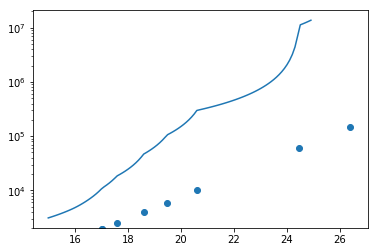

In [5]:
plt.plot(np.arange(15,25,0.1), 1.E6 * GWTr.interp_shot(np.arange(15,25,0.1)))
# plt.plot(GWTg.get_obs_filterlc(), GWTg.get_)
plt.scatter(GWTr.filterlc, GWTr.shotnoise_l * 1.E6)
# plt.ylim(0,0.01)
# plt.xlim(17.7,20.)

# def f(w):
#     f1 = interp1d(GWTg.wavelength_ang, GWTg.spectra_l[0])
#     return (5.03E7 * f1(w) * w * 69 * 3600)

# print(GWTg.filterlc, GWTg.shotnoise_l)

# # plt.plot(GWTg.wavelength_ang, 5.03E7 * GWTg.spectra_l[0] * GWTg.wavelength_ang * 804 * 3600)
# s = integrate.quad(f,1800,12000)[0]
# print(s, np.sqrt(s), np.sqrt(s)/s)

plt.yscale("log", nonposy='clip')

In [6]:
# # import pdb
# # pdb.pm()

# plt.scatter(GWTi.filterlc, GWTi.nphotons_l)
# np.sqrt(6000)/GWTi.nphotons_l

print(np.sort(GWTr.filterlc))
print(GWTr.shotnoise_l[np.argsort(GWTr.filterlc)])
print(GWTr.nphotons_l[np.argsort(GWTr.filterlc)])


f51 = interp1d(np.sort(GWTr.filterlc), GWTr.nphotons_l[np.argsort(GWTr.filterlc)], kind='linear',
                               bounds_error=False,
                               fill_value='extrapolate')

f51(23)

[ 17.03023171  17.03407982  17.58621879  18.59378284  19.475646
  20.60169534  24.46146207  26.37511328]
[ 0.00189873  0.00190322  0.00246449  0.0039358   0.00591689  0.00997817
  0.06093808  0.1496141 ]
[  2.77378783e+05   2.76071341e+05   1.64644306e+05   6.45554413e+04
   2.85635582e+04   1.00437954e+04   2.69291349e+02   4.46740139e+01]


array(3970.3095346415894)

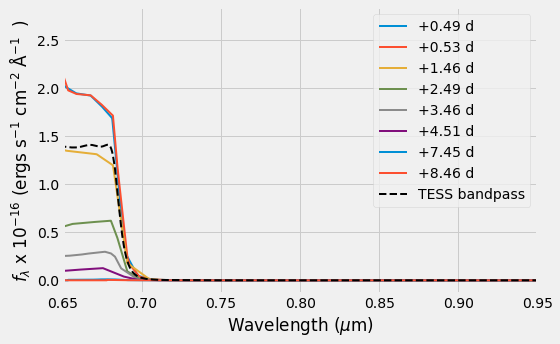

In [7]:
t = [0.49, 0.53, 1.46, 2.49, 3.46, 4.51, 7.45, 8.46]
with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=[8,5])

    for i, s in enumerate(GWT.spectra_l):
        plt.plot(GWT.wavelength_ang/10000, s/1E-16,
                     label ='+{} d'.format(t[i] ), lw=2)
#     plt.ylim(19.9,16.9)
    plt.xlim(0.6500,0.9500)
    plt.xlabel('Wavelength ($\mu$m)')
    plt.ylabel('$f_\lambda$ x $10^{-16}$ (ergs s$^{-1}$ cm$^{-2}$ Å$^{-1}$  )')
    plt.plot(GWT.filter_ang/10000, GWT.filter_qe*1.5, color='k', ls='--', lw=2, label='TESS bandpass')
    plt.legend(loc=0)
    fig.tight_layout()

In [8]:
# x = (1.514E6 * 70 * 3600)
# y = x * 10**(-0.4*11.3)
# z = np.sqrt(y) / (x * 10**(-0.4*17.3)) / np.sqrt(0.5)

integration = 30 #time in minutes

t_sim = np.arange(0,8,integration/1440)
# GWT.interp_obs(spectime)
m_sim = GWT.get_apmag(GWT.interp_obs(t_sim), GWT.obs_distance)

# # yerr_sim2 = np.sqrt(GWT.get_yerr_mag(m_sim, 11.3) ** 2 + z**2)
# # erroradd2 = np.random.normal(scale=yerr_sim2[np.isfinite(yerr_sim2)], size=len(m_sim[np.isfinite(yerr_sim2)]))

# # scale by the size of nimble compared with tess
# sizehack = 16**2 / 4.7**2

# yerr_sim = GWT.get_yerr_mag(m_sim,integration=integration/60) /sizehack

yerr_sim = GWT.get_yerr_mag_shot(m_sim, integration=integration/60)
erroradd = np.random.normal(scale=yerr_sim[np.isfinite(yerr_sim)], size=len(m_sim[np.isfinite(yerr_sim)]))

/Users/tom/gitcode/messing-with-gw/code/gwnimble.py:158: RuntimeWarning: invalid value encountered in log10
  yerr = np.log10(1.0 - (noise)) / -0.4


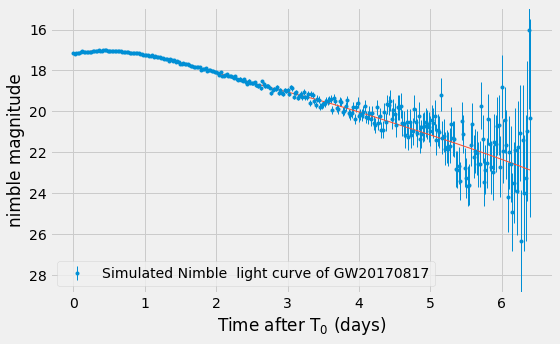

In [9]:
with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=[8,5])


    plt.errorbar(t_sim[np.isfinite(yerr_sim)],m_sim[np.isfinite(yerr_sim)]+erroradd, 
             yerr=yerr_sim[np.isfinite(yerr_sim)], fmt='.', lw=1,
                 label = 'Simulated Nimble  light curve of GW20170817')
#     plt.errorbar(t_sim[np.isfinite(yerr_sim2)],m_sim[np.isfinite(yerr_sim2)]+erroradd2, 
#              yerr=yerr_sim2[np.isfinite(yerr_sim2)], fmt='.', lw=1,
#                  label = 'Simulated TESS FFI light curve of GW20170817')
    plt.plot(t_sim[np.isfinite(yerr_sim)], m_sim[np.isfinite(yerr_sim)], lw=1)
    plt.ylim(28.9,14.9)
#     plt.xlim(0,4.5)
    plt.xlabel('Time after T$_0$ (days)')
    plt.ylabel('nimble magnitude')
    plt.legend(loc=3)
    fig.tight_layout()

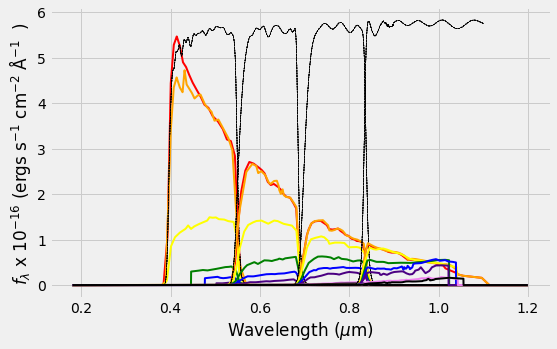

In [10]:
t = [0.49, 0.53, 1.46, 2.49, 3.46, 4.51, 7.45, 8.46]
c = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet','black']
with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=[8,5])
    for i, GWT in enumerate([GWTg, GWTr, GWTi, GWTz]):
        for i, s in enumerate(GWT.spectra_l):
            plt.plot(GWT.wavelength_ang/10000, s/1E-16,
                         label ='+{} d'.format(t[i] ), lw=2, color=c[i])
            plt.plot(GWT.filter_ang/10000, GWT.filter_qe*6, color='k', ls='--', lw=0.5, label='TESS bandpass')
#     plt.ylim(19.9,16.9)
#     plt.xlim(0.6500,0.9500)
    plt.xlabel('Wavelength ($\mu$m)')
    plt.ylabel('$f_\lambda$ x $10^{-16}$ (ergs s$^{-1}$ cm$^{-2}$ Å$^{-1}$  )')
    

/Users/tom/gitcode/messing-with-gw/code/gwnimble.py:158: RuntimeWarning: invalid value encountered in log10
  yerr = np.log10(1.0 - (noise)) / -0.4


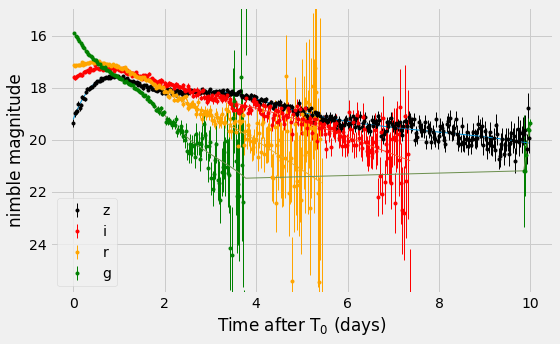

In [29]:
filters = ['z', 'i', 'r', 'g']
colors = ['black', 'red', 'orange', 'green']
with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=[8,5])

    for i, GWT in enumerate([GWTz, GWTi, GWTr, GWTg]):
        integration = 10 #time in minutes

        t_sim = np.arange(0,10,integration/1440)[i::4]
        GWT.interp_obs(spectime)
        m_sim = GWT.get_apmag(GWT._f5(t_sim), GWT.obs_distance)

        # scale by the size of nimble compared with tess
#         sizehack = 16**2 / 4.7**2

        yerr_sim = GWT.get_yerr_mag_shot(m_sim,integration=integration/60) #/sizehack
        erroradd = np.random.normal(scale=yerr_sim[np.isfinite(yerr_sim)], size=len(m_sim[np.isfinite(yerr_sim)]))        

        plt.errorbar(t_sim[np.isfinite(yerr_sim)],m_sim[np.isfinite(yerr_sim)]+erroradd, 
                 yerr=yerr_sim[np.isfinite(yerr_sim)], fmt='.', lw=1,
                     label = filters[i], color=colors[i])
    #     plt.errorbar(t_sim[np.isfinite(yerr_sim2)],m_sim[np.isfinite(yerr_sim2)]+erroradd2, 
    #              yerr=yerr_sim2[np.isfinite(yerr_sim2)], fmt='.', lw=1,
    #                  label = 'Simulated TESS FFI light curve of GW20170817')
        plt.plot(t_sim[np.isfinite(yerr_sim)], m_sim[np.isfinite(yerr_sim)], lw=1)
    plt.ylim(25.9,14.9)
#     plt.xlim(0,4.5)
    plt.xlabel('Time after T$_0$ (days)')
    plt.ylabel('nimble magnitude')
    plt.legend(loc=3)
    fig.tight_layout()
    fig.savefig('nimble-lc-combined.png', dpi=200)

/Users/tom/gitcode/messing-with-gw/code/gwnimble.py:158: RuntimeWarning: invalid value encountered in log10
  yerr = np.log10(1.0 - (noise)) / -0.4


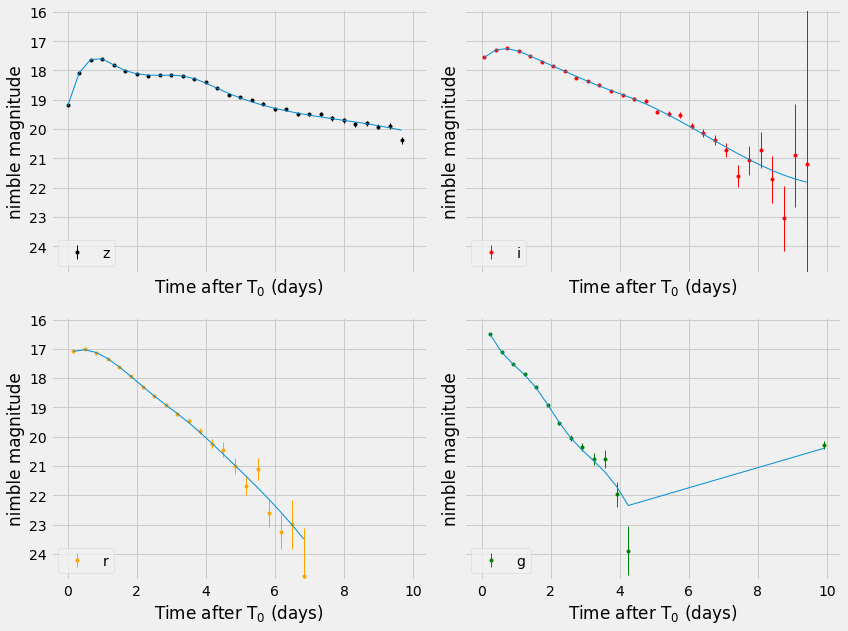

In [27]:
filters = ['z', 'i', 'r', 'g']
colors = ['black', 'red', 'orange', 'green']
with plt.style.context(('fivethirtyeight')):
    fig, axes = plt.subplots(2,2,figsize=[12,9],sharex=True, sharey=True)

    for i, GWT in enumerate([GWTz, GWTi, GWTr, GWTg]):
        integration = 120 #time in minutes
        ax = axes.flatten()[i]

        t_sim = np.arange(0,10,integration/1440)[i::4]
        GWT.interp_obs(spectime)
        m_sim = GWT.get_apmag(GWT._f5(t_sim), GWT.obs_distance)

        # scale by the size of nimble compared with tess
#         sizehack = 16**2 / 4.7**2

        yerr_sim = GWT.get_yerr_mag_shot(m_sim,integration=integration/60) #/sizehack
        erroradd = np.random.normal(scale=yerr_sim[np.isfinite(yerr_sim)], size=len(m_sim[np.isfinite(yerr_sim)]))        

        ax.errorbar(t_sim[np.isfinite(yerr_sim)],m_sim[np.isfinite(yerr_sim)]+erroradd, 
                 yerr=yerr_sim[np.isfinite(yerr_sim)], fmt='.', lw=1,
                     label = filters[i], color=colors[i])
    #     plt.errorbar(t_sim[np.isfinite(yerr_sim2)],m_sim[np.isfinite(yerr_sim2)]+erroradd2, 
    #              yerr=yerr_sim2[np.isfinite(yerr_sim2)], fmt='.', lw=1,
    #                  label = 'Simulated TESS FFI light curve of GW20170817')
        ax.plot(t_sim[np.isfinite(yerr_sim)], m_sim[np.isfinite(yerr_sim)], lw=1, zorder=10)
        ax.set_xlabel('Time after T$_0$ (days)')
        ax.set_ylabel('nimble magnitude')
        ax.legend(loc=3)
#         ax.grid()
    plt.ylim(24.9,15.9)
#     plt.xlim(0,8)

    fig.tight_layout()
    fig.savefig('nimble-griz.png', dpi=150)

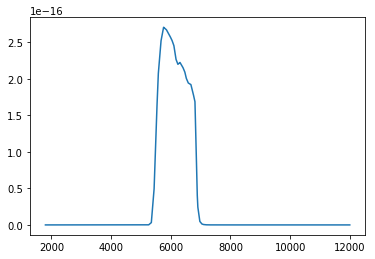

In [13]:
plt.plot(GWTr.wavelength_ang, GWTr.spectra_l[0])

In [13]:
flam = 5.03E7 * GWTr.wavelength_ang * GWTr.spectra_l[0]
nphotons = flam * 804 * (0.5 * 3600)
unc = np.sqrt(nphotons) / nphotons

/Users/tom/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 1)

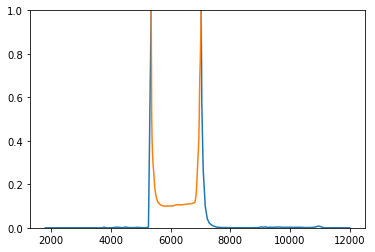

In [14]:
plt.plot(GWTr.wavelength_ang, nphotons)
plt.plot(GWTr.wavelength_ang, unc)
plt.ylim(0,1)

In [15]:
np.sqrt(nphotons) / nphotons

/Users/tom/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

In [16]:
a = np.sqrt(30000/60)/(30000/60)
b = np.sqrt(30000)/(30000)

In [22]:
GWTz.filterlc

array([ 17.79581384,  17.88182958,  17.89566237,  18.1660323 ,
        18.21411333,  18.70668699,  19.61018153,  19.78442816])

0.5645840096249999

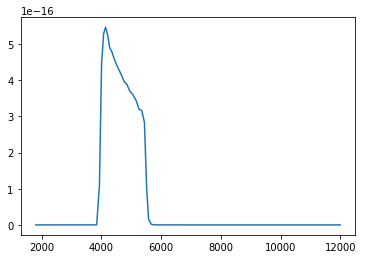

In [22]:
plt.plot(GWT.wavelength_ang, GWTg.spectra_l[0])

In [26]:
warr = np.array([])
i = 2500
for x in range(65):
    i = i + (i/100)
    warr = np.r_[warr,i]

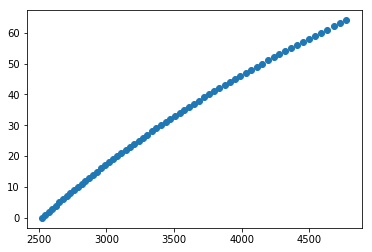

In [28]:
plt.scatter(warr,range(warr.shape[0]))
# plt.xlim(2500,6000)

In [31]:
warr = np.array([])
i = 2500
for x in range(200):
    i = i + (i/100)
    warr = np.r_[warr,i]

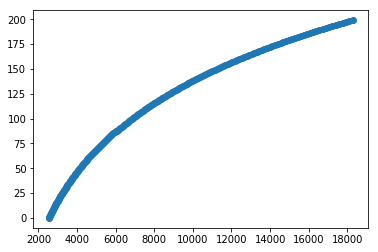

In [32]:
plt.scatter(warr,range(warr.shape[0]))